# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Шаг 1. Откройте файл с данными и изучите общую информацию**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt 

0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<bound method DataFrame.info of        total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartmen

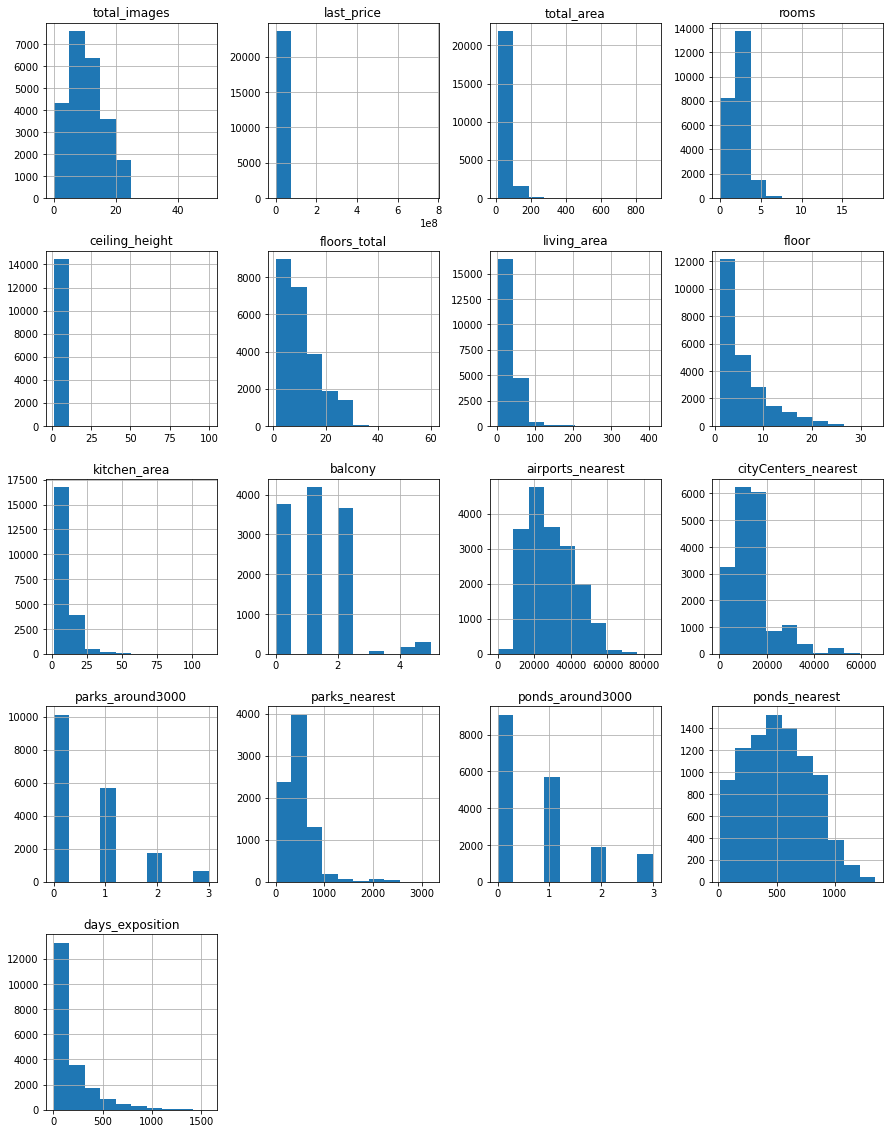

In [28]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.duplicated().sum())
display(data.head()) 
data.hist(figsize=(15, 20))
data.info

### Предобработка данных

**Найдем и изучим пропущенные значения в столбцах:
Определим, в каких столбцах есть пропуски.
Заполним пропущенные значения там, где это возможно.**

In [29]:
data.duplicated()
print(data.isna().sum())
data['balcony']=data['balcony'].fillna(0)
data['is_apartment']=data['is_apartment'].fillna(0)
data['floors_total']=data['floors_total'].fillna(data['floor'])
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())
data = data.dropna(axis=0, subset=['locality_name'])
#med = data.groupby(['rooms']).median()
#med['k_live'] = med['living_area']/med['total_area']
#med['k_kitch'] = med['kitchen_area']/med['total_area']
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median()
display(data.groupby(['rooms']).median())
print('')
print('Результаты после изменений')
print('')
print(data.isna().sum())
print(len(data))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,total_images,last_price,total_area,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
rooms,,,,,,,,,,,,,,,,,,
0,7.0,2700000.0,26.05,2.650,17.0,18.000,7.0,True,False,NaN,1.0,21460.0,13595.5,0.0,535.0,0.0,528.0,50.0
1,9.0,3600000.0,36.53,2.650,11.0,17.600,5.0,False,False,9.01,0.0,29353.0,14265.0,0.0,455.0,0.0,513.0,81.0
2,10.0,4770169.0,53.00,2.650,9.0,30.500,4.0,False,False,8.80,0.0,26945.0,13060.0,0.0,460.0,0.0,502.5,91.0
3,10.0,6200000.0,72.90,2.650,9.0,45.000,4.0,False,False,9.50,0.0,26454.0,12697.0,0.0,458.0,0.0,505.0,114.0
4,11.0,9000000.0,99.50,2.650,6.0,63.800,4.0,False,False,11.05,0.0,24705.0,8460.0,0.0,439.0,1.0,454.0,155.5
5,10.5,14000000.0,146.45,2.930,5.0,91.785,4.0,False,False,15.10,0.0,24306.0,4750.0,1.0,392.0,1.0,486.0,185.5
6,11.0,19000000.0,184.30,3.000,5.0,123.900,3.0,False,False,19.50,0.0,24239.0,4751.0,1.0,390.0,1.0,413.0,201.5
7,11.0,24900000.0,214.00,3.300,5.0,145.000,4.0,False,False,20.00,0.0,24336.0,4719.0,1.0,440.0,1.0,392.0,138.0
8,7.5,23095000.0,235.70,2.775,5.5,161.000,3.0,False,False,25.00,0.0,24261.5,4659.0,1.5,537.0,1.5,390.5,249.0



Результаты после изменений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64
23650


Предположим, что если не указано количество балконов, значит их нет. Также, если не указано, является ли объект апартаментами, предположим, что не является. Кроме того, много пропусков с высотой потолков. Их заменим на медианы. Пропуски в количестве этажей можно заменить на значение с номером этажа, так как количество точно не мньше. Также есть пропуски в площадях кухни и жилой площади. Их заменил на медманный значения по соответсвующим категориям по количеству комнат. Пропущено 49 названий населенных пунктов. Возможно, по умолчанию это Санкт-Петербург, но это не точно. Их следует удалить. Не указаны расстояния до ближайших аэропортов, центров городов. Вероятно, это связано с большой удаленностью. Также есть много пропусков в расстоянии до ближайших парков и прудов. При этом количество пропусков в расстоянии до парков и прудов сильно выше, чем количество пропусков в графах с наличием парков и прудов в радиусе 3000 метров. Вероятнее всего, данные просто не стали указывать, как не очень важные. Предположим, что если в радиусе 3000 метров не указаны парки и пруды, значит их там нет. Также есть пропуски в количестве дней, которые объявление провисело до снятия. Возможно, это саяазно с тем, что оно до сих пор не снято.

**Рассмотрим типы данных в каждом столбце:
Найдем столбцы, в которых нужно изменить тип данных.
Преобразуем тип данных в выбранных столбцах.**

In [30]:
print(data.dtypes)
data['floors_total'] = data['floors_total'].astype(int)
data['last_price'] = data['last_price'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
print(data.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object
total_images              int64
last_price                int64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     

/tmp/ipykernel_33/1953369007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'] = data['floors_total'].astype(int)
/tmp/ipykernel_33/1953369007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_price'] = data['last_price'].astype(int)
/tmp/ipykernel_33/1953369007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Мы изменили типы данных в столбцах: с количеством этажей на целочисленные, т.к. этаж не может быть дробным. То же самое касается количества балконов, прудов и парков рядом. Параметр, является ли объект апартаментами мы заменили на булевый, так как он может принимать значения True или False. Также стоит поменять тип данных в столбцах с ближайшими расстояниями и днями до момента снятия с публикации. Но мы не можем это осуществить из-за пропусков.

**Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. 
Найдем и устраним редкие и выбивающиеся значения. 
Если природа аномалии понятна и данные действительно искажены, то восстановим корректное значение.
В противном случае удалим редкие и выбивающиеся значения.**

In [31]:
print(data['locality_name'].unique())
print(data['locality_name'].nunique())
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].replace('городского типа ', '', regex=True)
print(data['locality_name'].sort_values().count)
print(data['locality_name'].nunique())


['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

/tmp/ipykernel_33/3462160995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
/tmp/ipykernel_33/3462160995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'] = data['locality_name'].str.lower()
/tmp/ipykernel_33/3462160995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

<bound method Series.count of 17075    бокситогорск
19186    бокситогорск
638      бокситогорск
3010     бокситогорск
22267    бокситогорск
             ...     
14629    шлиссельбург
18672    шлиссельбург
21880    шлиссельбург
4342     шлиссельбург
10806    шлиссельбург
Name: locality_name, Length: 23650, dtype: object>
329


Привели все к нижнему регистру, заменили все буквы "ё" на "е", убрали слова "городского типа" из названий. Сократили количество уникальных значений с 364 до 329.

AxesSubplot(0.125,0.125;0.775x0.755)


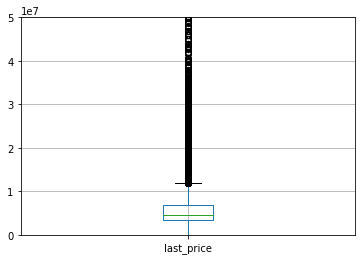

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64
8793      12190
14911    430000
17456    430000
16274    440000
5698     450000
9581     450000
17676    450000
16219    450000
18867    470000
21912    470000
Name: last_price, dtype: int64
22932


In [32]:
print(data.boxplot('last_price'))
plt.ylim(0, 50000000)
plt.show()
print(data['last_price'].describe())
data = data.loc[data['last_price'] <= 20000000]
print(data['last_price'].sort_values().head(10))
data = data.loc[data['last_price'] >= 490000]
print(len(data))

Далее ищем аномалии в столбцах. Смотрим минимальные и мксимальные значения по стоимости, строим диаграмму. Видно, что цену можно ограничить 490000 снизу и 20000000 сверху. Количество квартир в выдаче уменьшилось с 23650 до 22932.

AxesSubplot(0.125,0.125;0.775x0.755)


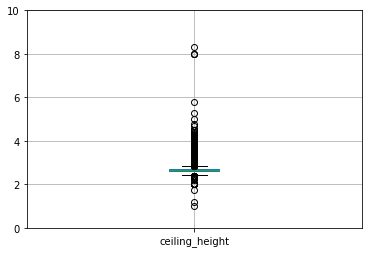

22919


In [33]:
print(data.boxplot('ceiling_height'))
plt.ylim(0, 10)
plt.show()
data.loc[data['ceiling_height'] >= 5, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 5, 'ceiling_height']/10
data = data.loc[(data['ceiling_height'] <= 5) & (data['ceiling_height'] >= 2)]
print(len(data))

Высоту потолков выше 5 приняли за ошибку и разделили на 10, предполагая, что забыли указать разделитель. Уберем объекты, где потолки выше 5 и ниже 2 метров. Осталось 22919 строк.

20273    460.8
11087    320.0
13397    309.7
22238    287.5
9397     263.8
Name: total_area, dtype: float64
19904    12.0
17961    13.0
19807    13.0
19546    13.0
19558    13.2
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


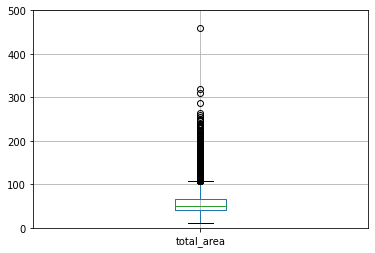

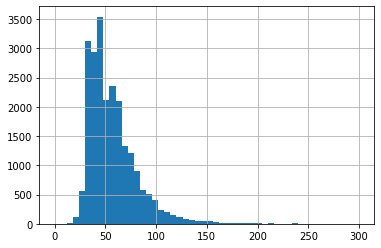

count    22919.000000
mean        56.721460
std         24.798756
min         12.000000
25%         40.000000
50%         51.000000
75%         67.100000
max        460.800000
Name: total_area, dtype: float64
22785


In [34]:
print(data['total_area'].sort_values(ascending=False).head())
print(data['total_area'].sort_values().head())
print(data.boxplot('total_area'))
plt.ylim(0, 500)
plt.show()
data['total_area'].hist(bins=50, range=(0,300))
plt.show()
print(data['total_area'].describe())
data = data.loc[data['total_area'] <= 160]
print(len(data))

Оставили квартиры площадью до 160 метров. Общее количество сократилось до 22785 с 22919.

8758     8
17991    7
14603    7
23555    7
4159     7
Name: rooms, dtype: int64
       total_images  last_price  total_area first_day_exposition  rooms  \
20082            10    16300000        98.4  2017-11-08T00:00:00      0   
3458              6     7400000        73.6  2017-05-18T00:00:00      0   
13613            16     8100000        58.4  2019-04-26T00:00:00      0   
10008            20     5050000        44.2  2017-09-14T00:00:00      0   
15319             4     5970000        43.3  2017-07-20T00:00:00      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
20082            3.10             5         60.5      2         False  ...   
3458             2.65             3         50.0      1         False  ...   
13613            3.30             7         33.0      6         False  ...   
10008            2.70             9         32.2      1         False  ...   
15319            2.80             9         28.2      2         False  ...   


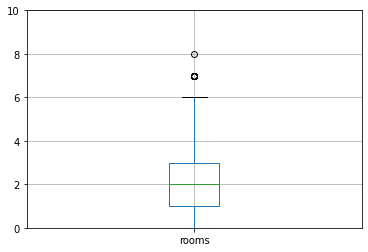

22784


In [35]:
print(data['rooms'].sort_values(ascending=False).head())
print(data[data['rooms']==0].sort_values(by='total_area',ascending=False).head())
print(data.boxplot('rooms'))
plt.ylim(0, 10)
plt.show()
data = data.loc[data['rooms'] <= 7]
print(len(data))

Оставили те квартиры, гле мeньше 7 комнат. Общее количество сократилось до 22784 с 22785.

2253     60
16731    52
397      36
11079    36
5807     36
Name: floors_total, dtype: int64
5300     1
11746    1
22855    1
23498    1
21603    1
Name: floors_total, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


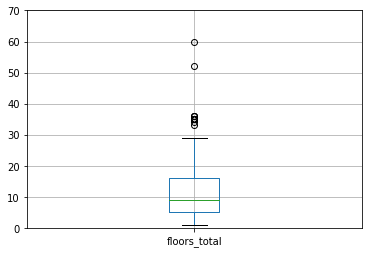

22753


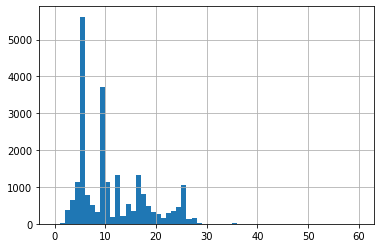

In [36]:
print(data['floors_total'].sort_values(ascending=False).head())
print(data['floors_total'].sort_values().head())
print(data.boxplot('floors_total'))
plt.ylim(0, 70)
plt.show()
data['floors_total'].hist(bins=60, range=(0,60))
data = data.loc[data['floors_total'] <= 30]
print(len(data))

Оставили квартиры в домах до 30 этажей. Общее количество сократилось до 22753 с 22784.

14603    145.0
18164    128.0
1067     125.0
10763    123.9
14649    123.9
Name: living_area, dtype: float64
21758    2.0
13915    2.0
3242     3.0
17582    5.0
21943    5.4
Name: living_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


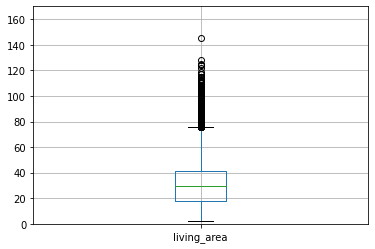

22705


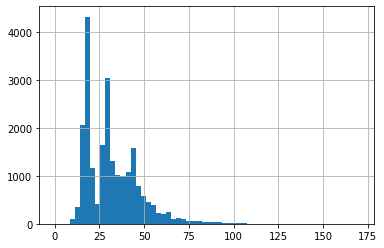

In [37]:
print(data['living_area'].sort_values(ascending=False).head())
print(data['living_area'].sort_values().head(5))
print(data.boxplot('living_area'))
plt.ylim(0, 170)
plt.show()
data['living_area'].hist(bins=60, range=(0,170))
data = data.loc[data['living_area'] <= 100]
print(len(data))

Оставили квартиры с жилой площадью до 100 метров. Общее количество сократилось до 22705 с 22753.

2629     27
6157     27
7711     27
23292    27
4091     27
Name: floor, dtype: int64
23698    1
8094     1
8093     1
8091     1
2912     1
Name: floor, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


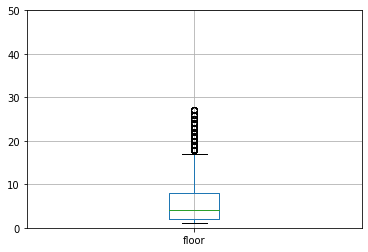

In [38]:
print(data['floor'].sort_values(ascending=False).head())
print(data['floor'].sort_values().head())
print(data.boxplot('floor'))
plt.ylim(0, 50)
plt.show()


Все квартиры в диапазоне с 1 по 27 этаж. Выбросов нет.

19499    64.0
15780    64.0
3561     60.0
4320     56.2
16964    55.7
Name: kitchen_area, dtype: float64
20217    1.3
19642    2.0
11033    2.0
16367    2.0
21419    2.0
Name: kitchen_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


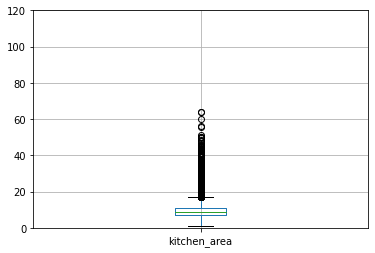

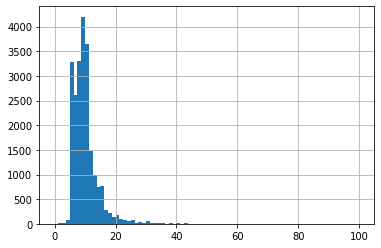

22469


In [39]:
print(data['kitchen_area'].sort_values(ascending=False).head())
print(data['kitchen_area'].sort_values().head())
print(data.boxplot('kitchen_area'))
plt.ylim(0, 120)
plt.show()
data['kitchen_area'].hist(bins=80, range=(0,100))
plt.show()
data = data.loc[data['kitchen_area'] <= 40]
print(len(data))

Оставили квартиры с кухнями площадью до 40 метров. Общее количество сократилось до 22469 с 22705.

In [40]:
print(data['balcony'].sort_values(ascending=False).head())
print(data['balcony'].sort_values().head())


19437    5
20888    5
22086    5
15023    5
5718     5
Name: balcony, dtype: int64
0        0
14084    0
14085    0
14086    0
14089    0
Name: balcony, dtype: int64


По количеству балконов нет выбросов, везде от 0 до 5.

9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
Name: airports_nearest, dtype: float64
21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


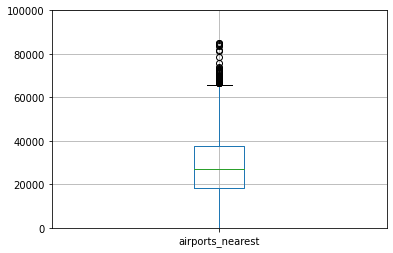

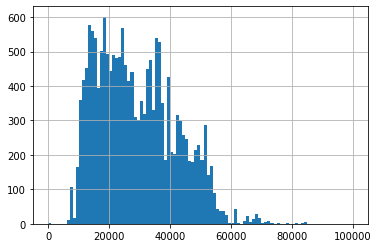

9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
Name: cityCenters_nearest, dtype: float64
1182     208.0
8614     215.0
1934     287.0
20873    291.0
22036    329.0
Name: cityCenters_nearest, dtype: float64
18453    3
7116     3
7782     3
7789     3
21494    3
Name: parks_around3000, dtype: int64
23698    0
11307    0
11308    0
19632    0
11311    0
Name: parks_around3000, dtype: int64
19430    3190.0
10959    3190.0
1590     3064.0
23080    2984.0
2659     2905.0
Name: parks_nearest, dtype: float64
14624    1.0
11949    3.0
22941    4.0
9344     7.0
20193    9.0
Name: parks_nearest, dtype: float64
11850    3
12555    3
12662    3
12688    3
12716    3
Name: ponds_around3000, dtype: int64
23698    0
12693    0
12694    0
12695    0
12696    0
Name: ponds_around3000, dtype: int64
20726    1344.0
19138    1341.0
19924    1341.0
1476     1337.0
12054    1313.0
Name: ponds_nearest, dtype: float64
1548     13.0
17585    13.0
1733     16.0
22077    16.0

In [41]:
print(data['airports_nearest'].sort_values(ascending=False).head())
print(data['airports_nearest'].sort_values().head())
print(data.boxplot('airports_nearest'))
plt.ylim(0, 100000)
plt.show()
data['airports_nearest'].hist(bins=100, range=(0,100000))
plt.show()
print(data['cityCenters_nearest'].sort_values(ascending=False).head())
print(data['cityCenters_nearest'].sort_values().head())
print(data['parks_around3000'].sort_values(ascending=False).head())
print(data['parks_around3000'].sort_values().head())
print(data['parks_nearest'].sort_values(ascending=False).head())
print(data['parks_nearest'].sort_values().head())
print(data['ponds_around3000'].sort_values(ascending=False).head())
print(data['ponds_around3000'].sort_values().head())
print(data['ponds_nearest'].sort_values(ascending=False).head())
print(data['ponds_nearest'].sort_values().head())

Не следует удалять данные на основании удаленности от аэропортов, прудов и пр, так как много пропусков. Слишком много данных можно потерять.

18843    1580.0
9553     1553.0
1885     1513.0
6691     1512.0
14093    1497.0
Name: days_exposition, dtype: float64
1632     1.0
16212    2.0
13061    2.0
16053    2.0
18355    3.0
Name: days_exposition, dtype: float64


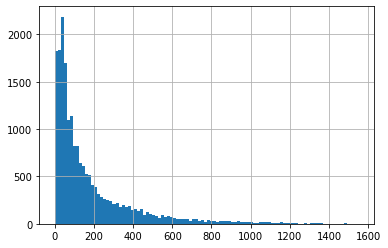

In [42]:
print(data['days_exposition'].sort_values(ascending=False).head())
print(data['days_exposition'].sort_values().head())
data['days_exposition'].hist(bins=100, range=(0,1553))
plt.show()

Если убирать объявления, которым больше 1500 дней, теряется сразу около 10% выборки, поэтому их не следует корректировать

In [43]:
print('Осталось от первоначальный выборки, %', 100-(23699-22469)/23699*100)

Осталось от первоначальный выборки, % 94.8099075910376


После обработки данных осталось почти 95% от изначальных.

здания до 30 этажей и жилая площадь до 80 метров. Убрали квартиры с кухнями больше 30 метров. Общее количество квартир сократилось до 12540.

In [44]:
# КОД РЕВЬЮЕРА

print(len(data))

data[['last_price', 'total_area','rooms', 'ceiling_height']].describe().loc[['min', 'max']]

22469


,last_price,total_area,rooms,ceiling_height
min,490000.0,12.0,1.0,2.0
max,20000000.0,160.0,7.0,4.8


### Посчитайте и добавьте в таблицу новые столбцы

**Добавим в таблицу новые столбцы со следующими параметрами:
<code>
*цена одного квадратного метра;
*день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
*месяц публикации объявления;
*год публикации объявления;
*тип этажа квартиры (значения — «первый», «последний», «другой»);
*расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).</code>**

In [45]:
data['price_per_m'] = data['last_price']/data['total_area']
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.loc[data['floor'] == 1, 'floor_type'] = 'first'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'last'
data['floor_type'] = data['floor_type'].fillna('other')
data['cityCenters_km'] = round(data['cityCenters_nearest']/1000)


print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
5            10     2890000        30.4           2018-09-10      1   
6             6     3700000        37.3           2017-11-02      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.65            11         18.6      1         False  ...   
2            2.65             5         34.3      4         False  ...   
5            2.65            12         14.4      5         False  ...   
6            2.65            26         10.6      6         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0                 2          755.0         

### Проведите исследовательский анализ данных

**Построим гистограммы по ряду параметров и опишем их.**

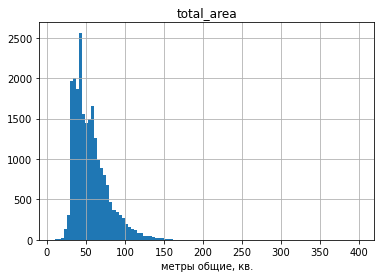

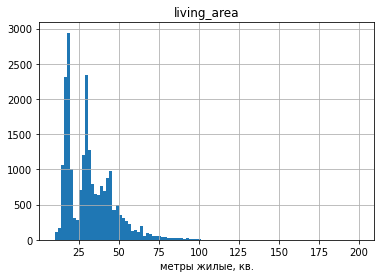

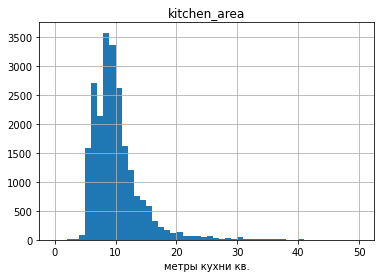

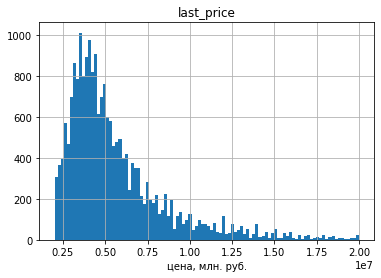

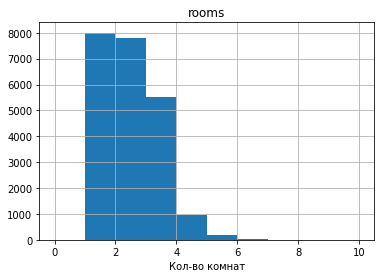

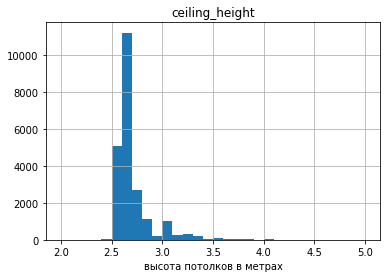

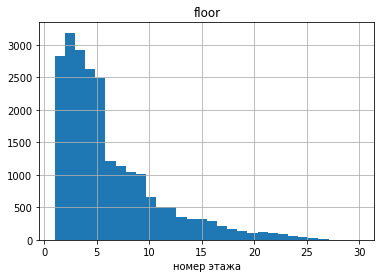

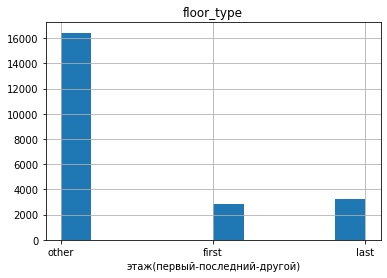

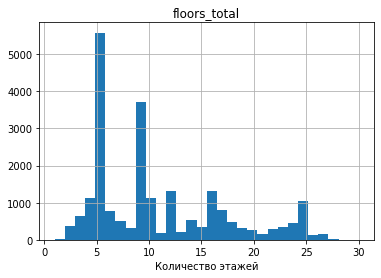

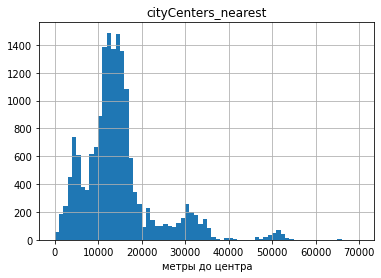

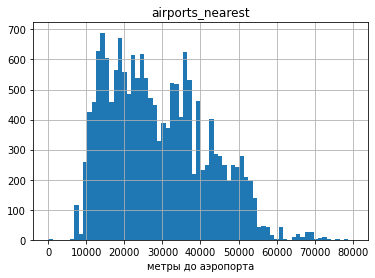

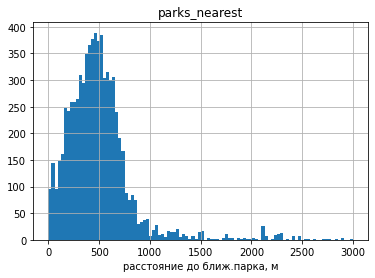

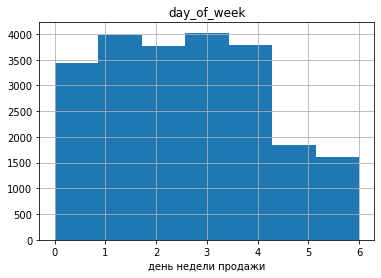

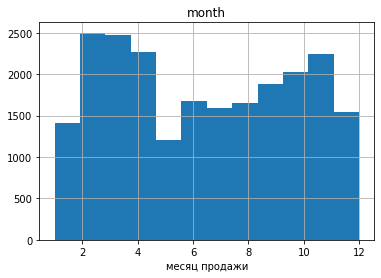

In [46]:
data['total_area'].hist(bins=100, range=(10,400))
plt.title('total_area')
plt.xlabel('метры общие, кв.')
plt.show()
data['living_area'].hist(bins=100, range=(10,200))
plt.title('living_area')
plt.xlabel('метры жилые, кв.')
plt.show()
data['kitchen_area'].hist(bins=50, range=(0,50))
plt.title('kitchen_area')
plt.xlabel('метры кухни кв.')
plt.show()
data['last_price'].hist(bins=100, range=(2000000,20000000))
plt.title('last_price')
plt.xlabel('цена, млн. руб.')
plt.show()
data['rooms'].hist(bins=10, range=(0,10))
plt.title('rooms')
plt.xlabel('Кол-во комнат')
plt.show()
data['ceiling_height'].hist(bins=30, range=(2,5))
plt.title('ceiling_height')
plt.xlabel('высота потолков в метрах')
plt.show()
data['floor'].hist(bins=30, range=(1,30))
plt.title('floor')
plt.xlabel('номер этажа')
plt.show()
data['floor_type'].hist()
plt.title('floor_type')
plt.xlabel('этаж(первый-последний-другой)')
plt.show()
data['floors_total'].hist(bins=30, range=(1,30))
plt.title('floors_total')
plt.xlabel('Количество этажей')
plt.show()
data['cityCenters_nearest'].hist(bins=70, range=(0,70000))
plt.title('cityCenters_nearest')
plt.xlabel('метры до центра')
plt.show()
data['airports_nearest'].hist(bins=70, range=(0,80000))
plt.title('airports_nearest')
plt.xlabel('метры до аэропорта')
plt.show()
data['parks_nearest'].hist(bins=100, range=(0,3000))
plt.title('parks_nearest')
plt.xlabel('расстояние до ближ.парка, м')
plt.show()
data['day_of_week'].hist(bins=7)
plt.title('day_of_week')
plt.xlabel('день недели продажи')
plt.show()
data['month'].hist(bins=12)
plt.title('month')
plt.xlabel('месяц продажи')
plt.show()


**Описание гистограмм**
1. По общей площади квартиры распределены таким образом, что основная часть имеет от 25 до 80 кв.м, пик около 45 метров.
2. Жилая площадь в промежутке от 15 до 60 метров. Есть 2 пика, около 20 метров и около 30 метров. Вероятно, это связано с разницей между 1-комнатными и 2-комнатными квартирами, а также студиями.
3. Площадь кухни в основном от 5 до 15 метров, с пиком около 8 метров. Вероятно, это связано со средней площадью кухни в типовых домах.
4. По стоимости, основная часть квартир стоит от 2 до 8 миллионов, с пиком около 4 миллионов.
5. В основном, в квартирах от 1 до 3 комнат. 4 комнаты встречаются реже.
6. Высота потолков в основном от 2,5 до 3 метров, с пиком 2,5 метра. Это связано со стандартной высотой потолков в типовых домах.
7. Чаще всего, кваритры расположены от 1 до 5 этажа. В целом, квартиры до 25 этажа встречаются регулярно.
8. Основная часть квартир находится не на 1 и последнем этаже. Количество на первом и последнем примерно одинаково.
9. Чаще всего, в домах 5 или 9 этажей, что соответствует самым распространненым многоквартирным домам.
10. Удаленность от центра, в основном, от 10 до 18 километров.
11. Удаленность от аэропорта носит более разнообразный характер, относительно равномерно распределено от 10 до 50 км.
12. Ближайшие парки, как правило, находятся в радиусе 1 километра от домов. Возможно, при большем отдалении парки зачастую не указывают, так как это не будет являтся преимуществом.
13. Объявления о продажи чаще всего размещают в будние дни. В выходные прсадка более, чем в 2 раза.
14. Видна некая сезонность: с февраля по апрель и с августа по ноябрь самые активные месяцы для продажи.

Text(0, 0.5, 'Подпись')

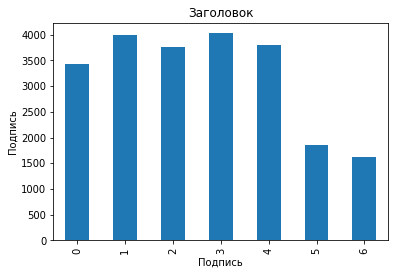

In [52]:
# КОД РЕВЬЮЕРА 2

data['day_of_week'].value_counts().sort_index().plot(kind='bar')

plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')

**Изучим, как быстро продавались квартиры. Для этого:**
1. Построем гистограмму.
2. Посчитаем среднее и медиану.

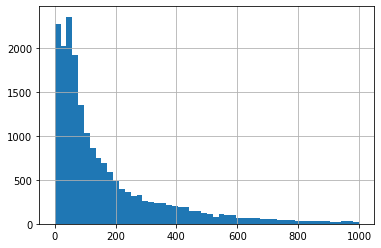

177.5224635829287
94.0


count    19565.000000
mean       177.522464
std        216.071396
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

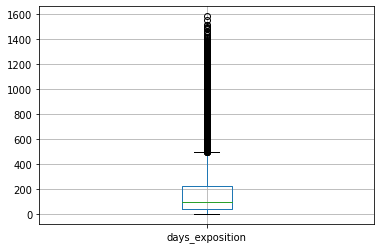

In [48]:
data['days_exposition'].hist(bins=52, grid=True, range=(0,1000))
plt.show()
print(data['days_exposition'].mean())
print(data['days_exposition'].median())
data.boxplot(column='days_exposition')
data['days_exposition'].describe()

Мы видим, что основная часть квартир продается до 240 дней. При этом медианное значение 104 дня, а среднее - 186 дней. Значит, есть значительное количество квартир, которые продаются очень долго, раз медиана так сильно отличается от среднего. Разумно считать, что если квартира продается быстрее 44 дней (1 квартиль), значит это быстро. Если дольше 240 дней (3 квартиль), значит квартира продается слишком долго.

**Изучим, какие факторы больше всего влияют на стоимость объекта**

                median                                                        
           day_of_week kitchen_area living_area month rooms total_area    year
last_price                                                                    
490000             1.5        7.255        17.3   8.5   1.0      34.55  2016.5
500000             2.0        8.000        17.3   3.0   1.0      36.00  2018.0
520000             4.0        5.500        18.0   9.0   1.0      30.00  2017.0
530000             2.0        5.800        16.0   2.0   1.0      29.60  2019.0
550000             3.0        7.500        20.0   4.0   1.0      36.00  2018.0


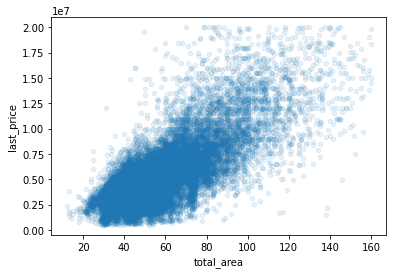

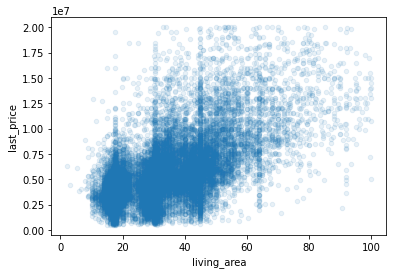

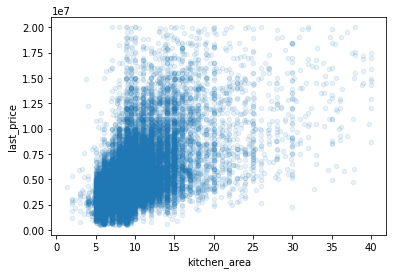

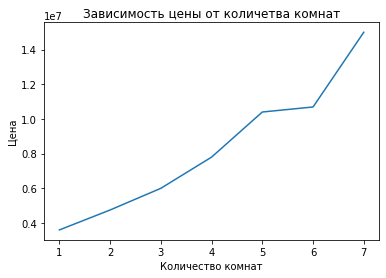

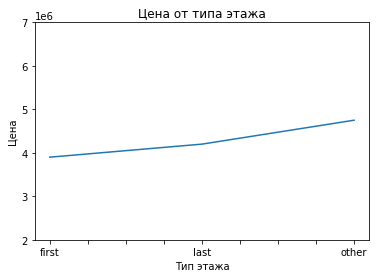

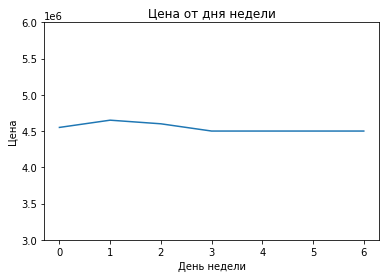

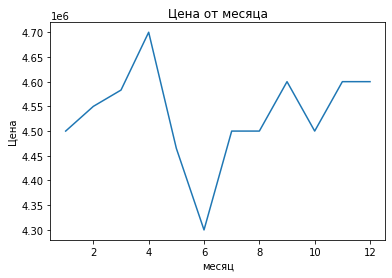

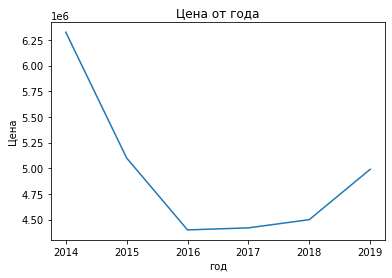

2018    8168
2017    7739
2019    2742
2016    2634
2015    1072
2014     114
Name: year, dtype: int64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_of_week,month,year,cityCenters_km
total_images,1.000000,0.159526,0.112164,0.087048,0.035516,0.016464,0.098864,0.032628,0.012706,-0.016025,...,0.021959,-0.009039,-0.003965,0.008785,-0.037108,0.132556,-0.009143,0.004095,0.150328,-0.036697
last_price,0.159526,1.000000,0.759623,0.475326,0.405967,0.135004,0.619656,0.101616,0.019657,-0.018423,...,0.277534,0.063529,0.298426,-0.091729,0.112022,0.668254,-0.015179,0.007670,-0.018083,-0.359593
total_area,0.112164,0.759623,1.000000,0.796209,0.337957,-0.026127,0.907720,-0.023319,0.019231,-0.029055,...,0.139267,0.010261,0.159706,-0.055245,0.142762,0.077538,-0.010764,0.012564,-0.071135,-0.196413
rooms,0.087048,0.475326,0.796209,1.000000,0.157909,-0.213607,0.895095,-0.160515,-0.006821,-0.023934,...,0.095292,-0.043887,0.071937,-0.022557,0.099012,-0.125289,-0.000446,0.001841,-0.040115,-0.128496
ceiling_height,0.035516,0.405967,0.337957,0.157909,1.000000,-0.056244,0.278318,-0.035054,0.064409,0.000873,...,0.213240,-0.052264,0.198388,-0.090760,0.085375,0.259532,-0.019727,-0.000904,-0.042257,-0.271252
floors_total,0.016464,0.135004,-0.026127,-0.213607,-0.056244,1.000000,-0.167669,0.676661,-0.023118,0.017066,...,-0.144529,0.094120,-0.051185,0.055121,-0.044465,0.287013,0.010026,0.012901,0.001679,-0.009353
living_area,0.098864,0.619656,0.907720,0.895095,0.278318,-0.167669,1.000000,-0.123146,0.008245,-0.019190,...,0.140673,-0.038801,0.123503,-0.035131,0.120778,-0.034376,-0.006204,0.001787,-0.057798,-0.175408
floor,0.032628,0.101616,-0.023319,-0.160515,-0.035054,0.676661,-0.123146,1.000000,-0.013223,0.011786,...,-0.097959,0.072567,-0.033973,0.040065,-0.037415,0.213743,0.008876,0.015854,0.003181,-0.001621
is_apartment,0.012706,0.019657,0.019231,-0.006821,0.064409,-0.023118,0.008245,-0.013223,1.000000,-0.000946,...,0.005484,-0.022838,0.011206,0.010240,-0.003100,0.018560,-0.007760,-0.004583,0.021695,0.017907
studio,-0.016025,-0.018423,-0.029055,-0.023934,0.000873,0.017066,-0.019190,0.011786,-0.000946,1.000000,...,-0.008022,-0.005647,-0.005014,-0.002273,-0.011314,0.004290,-0.003661,-0.008294,-0.031595,-0.001520


In [49]:
data_pivot = data.pivot_table(index='last_price', values =['total_area', 'living_area','kitchen_area', 'rooms','floor_type','day_of_week','month','year'], aggfunc=['median'])
print(data_pivot.head())

data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
plt.show()
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1)
plt.show()
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1)
plt.show()
data.groupby('rooms')['last_price'].median().plot()
plt.title('Зависимость цены от количетва комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()
data.groupby('floor_type')['last_price'].median().plot()
plt.title('Цена от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.ylim(2000000,7000000)
plt.show()
data.groupby('day_of_week')['last_price'].median().plot()
plt.title('Цена от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.ylim(3000000,6000000)
plt.show()
data.groupby('month')['last_price'].median().plot()
plt.title('Цена от месяца')
plt.xlabel('месяц')
plt.ylabel('Цена')
plt.show()
data.groupby('year')['last_price'].median().plot()
plt.title('Цена от года')
plt.xlabel('год')
plt.ylabel('Цена')
plt.show()
print(data['year'].value_counts())
data.corr()

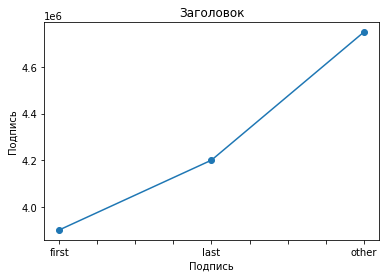

In [55]:
# КОД РЕВЬЮЕРА 2

data.groupby('floor_type')['last_price'].median().plot(marker='o')


plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')
plt.show()

Можно увидеть, что больше всего стоимость квартир зависит (по убыванию степени зависимости) от общей площади, жилой площади и площади кухни. При этом, чем дороже квартира - тем более размыта эта зависимость. Также есть очевидная зависимость от количества комнат: больше комнат - дороже квартира.
Кроме того, дорогих квартир на первом этаже меньше всего, а квартиры не на 1 и не на последнем этаже дороже. В выходные дни продают меньше дорогих квартир. Летом так же есть определенный спад по продаже дорогих квартир, особенно в июне. При этом пик приходится на весну и осень. Средняя стоимость квартир была максимальна в 2014 году, вероятно в связи с меньшим количеством объявлений (114 в 2014 против 8168 в 2018 году). с 2017 года стоимость квартир растет.

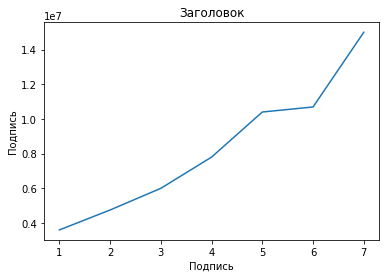

In [19]:
# КОД РЕВЬЮЕРА


data.groupby('rooms')['last_price'].median().plot()


plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')
plt.show()

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [58]:
print(data['locality_name'].value_counts().head(10))
list_local = data['locality_name'].value_counts().index.tolist()
list_local = list_local[:9]
print(list_local)
data_local=data.query('locality_name in @list_local')
data_local_pivot = data_local.pivot_table(index='locality_name', values='price_per_m', aggfunc='mean')
print(data_local_pivot.sort_values(by='price_per_m'))

санкт-петербург      14687
поселок мурино         528
поселок шушары         435
всеволожск             391
пушкин                 355
колпино                337
поселок парголово      322
гатчина                306
деревня кудрово        283
выборг                 235
Name: locality_name, dtype: int64
['санкт-петербург', 'поселок мурино', 'поселок шушары', 'всеволожск', 'пушкин', 'колпино', 'поселок парголово', 'гатчина', 'деревня кудрово']
                     price_per_m
locality_name                   
всеволожск          67155.598529
гатчина             68797.702047
колпино             75333.295801
поселок шушары      78431.251170
поселок мурино      85001.732423
поселок парголово   90448.423806
деревня кудрово     92297.218847
пушкин             101928.862113
санкт-петербург    108718.254448


Мы нашли среднюю стоимость квадратного метра в 10 населенных пунктах с большим количеством объявлений. Самый дорогой метр в Санкт-Петербурге - 108718 рублей за метр. Самый дешевый метр из списка во Всеволжске - 67155 рубля за метр.

**Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.**

                  price_per_m
cityCenters_km               
0.0             122387.691331
1.0             131017.095649
2.0             127385.274101
3.0             114428.682182
4.0             122290.180657
5.0             126946.396319
6.0             127372.211770
7.0             124263.819793
8.0             120240.924456
9.0             110607.745111
10.0            111630.491659
11.0            107413.259459
12.0            107066.909632
13.0            107504.354412
14.0            103782.207068
15.0            103746.973809
16.0            100087.171470
17.0             96079.472170
18.0             96302.512380
19.0             98703.653988
20.0             87214.901385
21.0             94540.814651
22.0             91405.542389
23.0             92158.357763
24.0             84962.459210
25.0             91531.371618
26.0             89285.876593
27.0            132115.709459
28.0             81161.915320
29.0             72953.365445


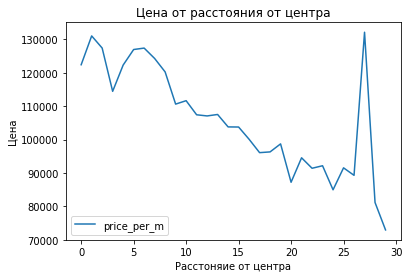

-0.3336510637725926


In [61]:
data_sp = data.query("locality_name == 'санкт-петербург'")
cost_km = data_sp.pivot_table(index='cityCenters_km', values='price_per_m', aggfunc='mean')
print(cost_km)
cost_km.plot()
plt.title('Цена от расстояния от центра')
plt.xlabel('Расстоняие от центра')
plt.ylabel('Цена')
plt.show()
print(data_sp['price_per_m'].corr(data_sp['cityCenters_km']))

По таблице и графику видно, что как правило, чем больше расстояние от центра - тем ниже цена за метр. Коэффициент корреляции равен -0,33, что говорит о том, что при увеличении отдаления от центра, стоимость уменьшается. Однако, видно, что на удалении 26-28км есть объект(ы) значительно дороже среднего. Что говорит о том, что не всегда удаленность от центра и цена связаны напрямую, тем не менее, зависимость очевидна. При этом коэффициент имеет модуль, далекий от 1, но он был бы значительно выше, если бы не дорогой обхект на большом удалении.

### Общий вывод

Мы проанализировали данные сервиса Яндекс.Недвижимость по Санкт-петербургу и Ленинградской области. Обработали информацию, избавились от выбросов и аномалий, дубликатов, а также внесли изменения в некорректные данные, где это было возможно. Далее провели исследовательский анализ. Выявили ряд зависимостей, увидели сезонную зависимость рынка недвижимости. Определили, что больше всего стоимость квартир зависит от площади и жилой площади, площади кухни, количества комнат, удаленности от центра. Определили, что в выходные в целом средняя стоимость квартир ниже. Выяснили, что квартиры на первом и поледнем этажах стоят дешевле. Определили 10 самых популярных населенных пунктов и нашли для них среднюю стоимость квадратного метра. Ожидаемо, дороже всех оказался Санкт-Петербург. Проанализировали данные по всем параметрам, определили, квартиры с какими характеристиками наиболее и наименее популярны на рынке. В целом, справились с поставленной задачей.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод